In [2]:
from manim import*
import numpy as np
config.media_width = "50%"

Manim Community v0.17.3

[10/24/23 22:58:06] INFO                                                                   ]8;id=89693;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=174059;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\PC\Desktop\ManimCE1\media\images\ManimCE1\MyScene_M                         
                             animCE_v0.17.3.png'                                                                   
                                                                                                                   

                    INFO     Rendered MyScene                                                          ]8;id=153723;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=307189;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 0 animations                                                                   

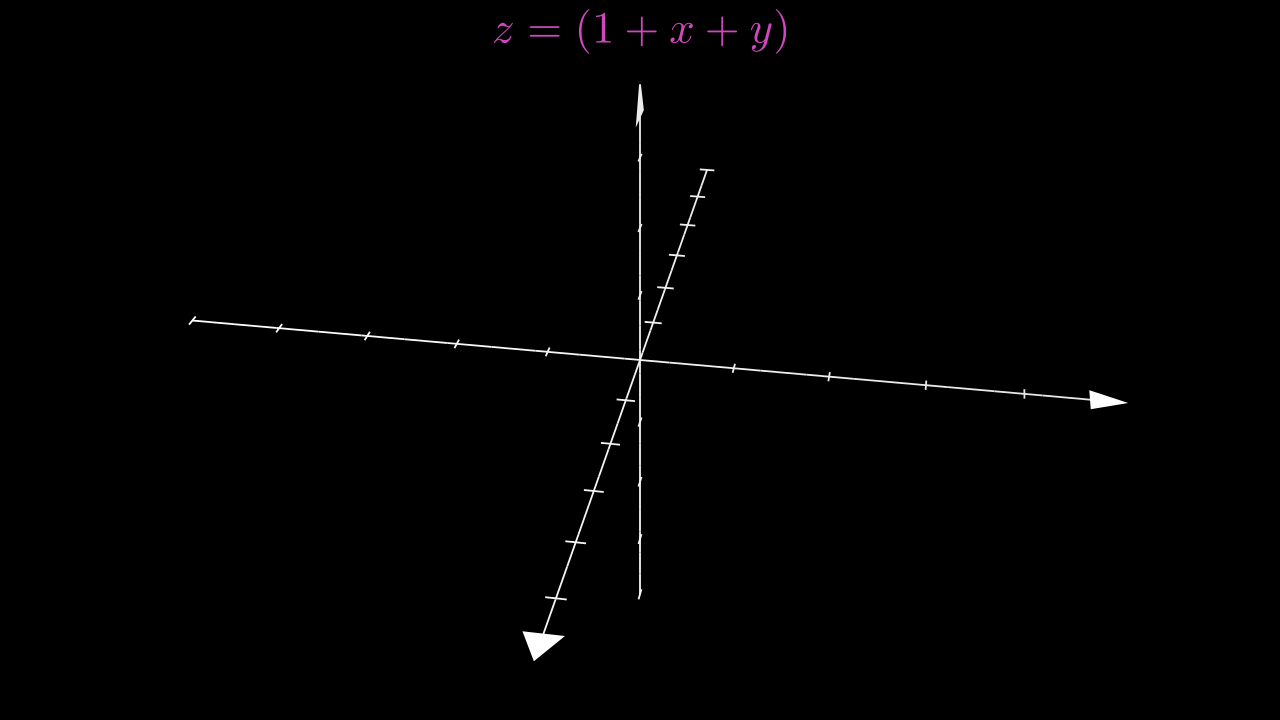

In [3]:
%%manim -qm MyScene

class MyScene(ThreeDScene):

    def construct(self):
        axes = ThreeDAxes()
        self.add(axes)
        self.set_camera_orientation(phi=60 * DEGREES, theta=10 * DEGREES)

        fn_text = MathTex("z = (1 + x + y)").set_color(PINK)
        self.add_fixed_in_frame_mobjects(fn_text)
        fn_text.to_edge(UP, buff=0.1)
        self.fn_text = fn_text

In [3]:
from manim import *
from manim.mobject.graphing.coordinate_systems import CoordinateSystem

def f(x):
    return  1/4*x**2
def point(t):
    return t,f(t)
l = []
class IntegralAnimation(Scene):
    def construct(self):
        min_x = 0
        min_y = 0
        max_x = 5
        max_y = 5
        # 创建坐标系
        axes = Axes(
            x_range=[min_x, max_x],  # x轴范围
            y_range=[min_y, max_y],  # y轴范围
            x_length=5,       # x轴的长度
            y_length=5,       # y轴的长度
            x_axis_config={"numbers_to_include": []},  # 隐藏x轴的数字和箭头
            y_axis_config={"numbers_to_include": []},  # 隐藏y轴的数字和箭头
            axis_config={"color": BLUE},  # 坐标轴的配置
            tips=True,        # 是否显示坐标轴的箭头
        ).add_coordinates()


        # 添加坐标轴标签
        labels = axes.get_axis_labels(
            Tex("u").scale(0.7), Text("v").scale(0.45)
        )
        self.play(Create(axes), Write(labels))

        # 做变换，y = v(t),x = u(t)

        # 绘制曲线
        graph = axes.plot(f, color=WHITE,x_range=[min_x,max_x-1])
        self.play(Create(graph))
        # 绘制积分点，下限
        t = 2
        a = point(t)
        dot_axes1 = Dot(axes.coords_to_point(a[0],a[1]), color=GREEN)
        lines1 = axes.get_lines_to_point(axes.c2p(a[0],a[1]))
        self.play(Create(dot_axes1), Create(lines1))
        # 绘制积分点，上限
        t = 4
        b = point(t)
        dot_axes2 = Dot(axes.coords_to_point(b[0],b[1]), color=RED)
        lines2 = axes.get_lines_to_point(axes.c2p(b[0],b[1]))
        self.play(Create(dot_axes2), Create(lines2))

        # 绘制黎曼意义下的面积,关于x轴
        u = axes.get_area(graph, x_range=[a[0], b[0]], color=YELLOW, opacity=0.2)
        self.play(Create(u))

        # 绘制黎曼意义下的面积,关于y轴
        v = axes.get_area_y(graph, x_range=[a[0], b[0]], color=ORANGE, opacity=0.3)
        self.play(Create(v))


        # 绘制局部面积
        rect2 = Rectangle(
            width =a[0]-min_x,  # 矩形的宽度
            height=a[1]-min_y,  # 矩形的高度
            color=GREEN,  # 矩形的颜色
            fill_opacity=0.5,  # 填充不透明度
            stroke_width=1,  # 边框宽度
            stroke_color=BLUE,  # 边框颜色
        )
        # 让矩形的左下角与坐标轴原点重合
        rect2.shift(axes.c2p(0,0) - rect2.get_corner(DL))
        self.play(Create(rect2))

        # 绘制总面积
        rect1 = Rectangle(
            width =b[0]-min_x,  # 矩形的宽度
            height=b[1]-min_y,  # 矩形的高度
            color=GREEN,  # 矩形的颜色
            fill_opacity=0.5,  # 填充不透明度
            stroke_width=1,  # 边框宽度
            stroke_color=WHITE,  # 边框颜色
        )
        # 让矩形的左下角与坐标轴原点重合
        rect1.shift(axes.c2p(0,0) - rect1.get_corner(DL))
        self.play(Create(rect1))



        # 移动
        group1 = Group(
            axes,
            labels,
            dot_axes1,
            dot_axes2,
            lines1,
            lines2,
            graph,
            u,
            v,
            rect1,
            rect2,
        )

        # 缩放、移动
        self.play(Transform(group1,group1.copy().scale(0.3).to_edge(UP)))

        group1_cpoy1 = group1.copy()
        group1_cpoy2 = group1.copy()
        group1_cpoy3 = group1.copy()
        group1_cpoy4 = group1.copy()
        group21 = Group(
            axes.copy(),
            labels.copy(),
            dot_axes1.copy(),
            dot_axes2.copy(),
            lines1.copy(),
            lines2.copy(),
            graph.copy(),
            u.copy(),
        )
        group21 = Group(
            axes.copy(),
            labels.copy(),
            dot_axes1.copy(),
            dot_axes2.copy(),
            lines1.copy(),
            lines2.copy(),
            graph.copy(),
            v.copy(),
        )
        group22 = Group(
            axes.copy(),
            labels.copy(),
            dot_axes1.copy(),
            dot_axes2.copy(),
            lines1.copy(),
            lines2.copy(),
            graph.copy(),
            u.copy(),
        )
        group23 = Group(
            axes.copy(),
            labels.copy(),
            dot_axes1.copy(),
            dot_axes2.copy(),
            lines1.copy(),
            lines2.copy(),
            graph.copy(),
            rect1.copy(),
        )
        group24 = Group(
            axes.copy(),
            labels.copy(),
            dot_axes1.copy(),
            dot_axes2.copy(),
            lines1.copy(),
            lines2.copy(),
            graph.copy(),
            rect2.copy(),
        )

        self.play(Transform(group1_cpoy3,group23.move_to(ORIGIN+5*LEFT)))
        self.play(Transform(group1_cpoy4,group24.next_to(group23,5*RIGHT)))
        self.play(Transform(group1_cpoy2,group22.next_to(group24,6*RIGHT)))
        self.play(Transform(group1_cpoy1,group21.next_to(group22,7*RIGHT)))

        # 公式恒等式
        math_formula1 = Tex(r'$S_{1} = u(b)v(b)$')
        math_formula1.next_to(group23, DOWN)
        math_formula2 = Tex(r'$S_{2} = u(a)v(a)$')
        math_formula2.next_to(group24, DOWN)
        math_formula3 = Tex(r'$S_{3} = \int_{a}^{b}v\frac{du}{dx}dx$')
        math_formula3.next_to(group22, DOWN)
        math_formula4 = Tex(r'$S_{4} = \int_{a}^{b}u\frac{dv}{dx}dx$')
        math_formula4.next_to(group21, DOWN)
        self.play(Create(math_formula1),Create(math_formula2),Create(math_formula3),Create(math_formula4),)

        math_formula5 = Tex(r'$-$')
        math_formula5.next_to(group23, 1.5*RIGHT)

        math_formula6 = Tex(r'$=$')
        math_formula6.next_to(group24, 2*RIGHT)

        math_formula7 = Tex(r'$+$')
        math_formula7.next_to(group22, 2.5*RIGHT)

        self.play(Create(math_formula5),Create(math_formula6),Create(math_formula7))
        self.wait(5)
        math_formula8 = Tex(r'$u(b)v(b)-u(a)v(a) = \int_{a}^{b}v\frac{du}{dx}dx+\int_{a}^{b}u\frac{dv}{dx}dx$')

        math_formula_group = Group(
            math_formula1,
            math_formula2,
            math_formula3,
            math_formula4
        )
        self.play(Transform(math_formula_group,math_formula8.move_to(ORIGIN+2*DOWN)))
        self.wait(5)

mode = 1
if mode == 2:
    config.pixel_height = 2160    # 设置视频高度
    config.pixel_width = 3840     # 设置视频宽度
    config.frame_height = 21.6    # 设置帧高度
    config.frame_width = 38.4     # 设置帧宽度
    config.frame_rate = 30  # 设置帧率
    scene = IntegralAnimation()
    scene.render()
else:
    config.pixel_height = 720
    config.pixel_width = 1280
    config.frame_height = 7.2
    config.frame_width = 12.8
    config.frame_rate = 30
    scene = IntegralAnimation()
    scene.render()


[10/27/23 09:20:08] INFO     Animation 0 : Using cached data (hash :                           ]8;id=714772;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=370413;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             3398757782_1451024220_223132457)                                                      

                    INFO     Animation 1 : Using cached data (hash :                           ]8;id=156003;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=541396;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             621861868_925154946_74832077)                                                         

                    INFO     Animation 2 : Using cached data (hash :                           ]8;id=890894;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=937331;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             621861868_2041549872_1571095272)                                                      

[10/27/23 09:20:09] INFO     Animation 3 : Using cached data (hash :                           ]8;id=624019;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=986156;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             621861868_3038165733_3101647978)                                                      

[10/27/23 09:20:10] INFO     Animation 4 : Partial movie file written in                   ]8;id=744676;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=107019;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\720p30\partial_mov                         
                             ie_files\IntegralAnimation\621861868_4264318522_3708751258.mp                         
                             4'                                                                                    

[10/27/23 09:20:11] INFO     Animation 5 : Partial movie file written in                   ]8;id=871626;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=992509;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\720p30\partial_mov                         
                             ie_files\IntegralAnimation\621861868_835158179_1072902639.mp4                         
                             '                                                                                     

                    INFO     Animation 6 : Partial movie file written in                   ]8;id=176831;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=381349;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\720p30\partial_mov                         
                             ie_files\IntegralAnimation\621861868_3168824207_2515639100.mp                         
                             4'                                                                                    

[10/27/23 09:20:12] INFO     Animation 7 : Partial movie file written in                   ]8;id=522944;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=942474;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\720p30\partial_mov                         
                             ie_files\IntegralAnimation\621861868_3904093505_2605732337.mp                         
                             4'                                                                                    

[10/27/23 09:20:14] INFO     Animation 8 : Partial movie file written in                   ]8;id=80440;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=251695;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\720p30\partial_mov                         
                             ie_files\IntegralAnimation\621861868_1721100161_2358810818.mp                         
                             4'                                                                                    

[10/27/23 09:20:24] INFO     Animation 9 : Partial movie file written in                   ]8;id=469534;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=821199;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\720p30\partial_mov                         
                             ie_files\IntegralAnimation\621861868_3174196662_219832391.mp4                         
                             '                                                                                     

[10/27/23 09:20:35] INFO     Animation 10 : Partial movie file written in                  ]8;id=435020;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=673585;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\720p30\partial_mov                         
                             ie_files\IntegralAnimation\621861868_760097792_2188039775.mp4                         
                             '                                                                                     

[10/27/23 09:20:45] INFO     Animation 11 : Partial movie file written in                  ]8;id=41911;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=830122;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\720p30\partial_mov                         
                             ie_files\IntegralAnimation\621861868_2641316838_1440039086.mp                         
                             4'                                                                                    

[10/27/23 09:20:56] INFO     Animation 12 : Partial movie file written in                  ]8;id=421993;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=101617;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\720p30\partial_mov                         
                             ie_files\IntegralAnimation\621861868_843687293_2634011400.mp4                         
                             '                                                                                     

                    INFO     Writing $S_{1} = u(b)v(b)$ to media\Tex\104233ad7c19971e.tex    ]8;id=889553;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=910345;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\utils\tex_file_writing.py#97\97]8;;\

[10/27/23 09:20:57] INFO     Writing $S_{2} = u(a)v(a)$ to media\Tex\4f86ea2a5ce146c2.tex    ]8;id=885769;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=324318;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\utils\tex_file_writing.py#97\97]8;;\

[10/27/23 09:20:59] INFO     Writing $S_{3} = \int_{a}^{b}v\frac{du}{dx}dx$ to               ]8;id=591477;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=695388;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\utils\tex_file_writing.py#97\97]8;;\
                             media\Tex\5c96f0c9823a99a0.tex                                                        

[10/27/23 09:21:00] INFO     Writing $S_{4} = \int_{a}^{b}u\frac{dv}{dx}dx$ to               ]8;id=222532;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=176170;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\utils\tex_file_writing.py#97\97]8;;\
                             media\Tex\9284d648ffbc1028.tex                                                        

[10/27/23 09:21:06] INFO     Animation 13 : Partial movie file written in                  ]8;id=594748;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=950415;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\720p30\partial_mov                         
                             ie_files\IntegralAnimation\621861868_3546150138_3442179789.mp                         
                             4'                                                                                    

                    INFO     Writing $-$ to media\Tex\ec77e86465896964.tex                   ]8;id=800028;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=752757;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\utils\tex_file_writing.py#97\97]8;;\

[10/27/23 09:21:08] INFO     Writing $=$ to media\Tex\eb91efa5b2c3f24f.tex                   ]8;id=462862;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=78965;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\utils\tex_file_writing.py#97\97]8;;\

[10/27/23 09:21:09] INFO     Writing $+$ to media\Tex\b712a448e2086364.tex                   ]8;id=228702;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=273924;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\utils\tex_file_writing.py#97\97]8;;\

[10/27/23 09:21:15] INFO     Animation 14 : Partial movie file written in                  ]8;id=588095;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=73256;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\720p30\partial_mov                         
                             ie_files\IntegralAnimation\621861868_3516128155_4112162476.mp                         
                             4'                                                                                    

[10/27/23 09:21:18] INFO     Animation 15 : Partial movie file written in                  ]8;id=236476;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=946754;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\720p30\partial_mov                         
                             ie_files\IntegralAnimation\621861868_3847688501_2383737687.mp                         
                             4'                                                                                    

                    INFO     Writing $u(b)v(b)-u(a)v(a) =                                    ]8;id=199904;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=810964;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\utils\tex_file_writing.py#97\97]8;;\
                             \int_{a}^{b}v\frac{du}{dx}dx+\int_{a}^{b}u\frac{dv}{dx}dx$ to                         
                             media\Tex\9dbe83ffe45d2d1d.tex                                                        

[10/27/23 09:21:57] INFO     Animation 16 : Partial movie file written in                  ]8;id=206210;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=454912;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\720p30\partial_mov                         
                             ie_files\IntegralAnimation\621861868_2739249813_2604412744.mp                         
                             4'                                                                                    

[10/27/23 09:22:10] INFO     Animation 17 : Partial movie file written in                  ]8;id=383831;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=936107;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\720p30\partial_mov                         
                             ie_files\IntegralAnimation\621861868_3847688501_1483631030.mp                         
                             4'                                                                                    

                    INFO     Combining to Movie file.                                      ]8;id=63803;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=210683;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=202682;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=307426;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\720p30\IntegralAni                         
                             mation.mp4'                                                                           
                                                                                                                   

                    INFO     Rendered IntegralAnimation                                                ]8;id=114410;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=81913;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 18 animations                                                                  

In [3]:
%%manim -qm Cycloid

from manim import *

class Cycloid(Scene):

    def construct(self):

        CycloidTxt = Text("Cycloid", font="TeX Gyre Termes").scale(1.5).to_edge(UP)

        r = 3 / PI
        corr = 1 / config.frame_rate  # missed frame correction

        BL = NumberLine().shift(DOWN * r * 2)  # Base Line

        C = Circle(r, color="#F72119").next_to(BL.n2p(-6), UP, buff=0)
        DL = DashedLine(C.get_center(), C.get_top(), color="#A5ADAD")
        CP = Dot(DL.get_start(), color="#ff3503")  # Center Point
        TP = Dot(DL.get_end(), color="#00EAFF").scale(1.2)  # Tracing Point

        RC = VGroup(C, DL, CP, TP)  # Rolling Circle

        self.dir = 1  # direction of motion

        def Rolling(m, dt):  # update_function
            theta = self.dir * -PI
            m.rotate(dt * theta, about_point=m[0].get_center()).shift(dt * LEFT * theta * r)

        Cycloid = TracedPath(TP.get_center, stroke_width=6.5, stroke_color="#4AF1F2")

        self.add(CycloidTxt, BL, Cycloid, RC)

        RC.add_updater(Rolling)
        self.wait(4 + corr)

        RC.suspend_updating(Rolling)
        Cycloid.clear_updaters()

        self.wait()
        self.dir = -1  # direction change, rolling back

        RC.resume_updating(Rolling)
        self.play(Uncreate(Cycloid, rate_func=lambda t: linear(1 - t), run_time=4 + corr))
            
        RC.clear_updaters()
        self.wait()

[10/27/23 11:34:28] WARNING  Font TeX Gyre Termes not in ['Agency FB', 'Algerian',              ]8;id=411338;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\mobject\text\text_mobject.py\text_mobject.py]8;;\:]8;id=13846;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\mobject\text\text_mobject.py#441\441]8;;\
                             'ArhialkhanMJ', 'Arial', 'Arial Black', 'Arial Narrow', 'Arial                        
                             Rounded MT Bold', 'Bahnschrift', 'Bahnschrift Condensed',                             
                             'Bahnschrift Light', 'Bahnschrift Light Condensed', 'Bahnschrift                      
                             Light SemiCondensed', 'Bahnschrift SemiBold', 'Bahnschrift                            
                             SemiBold Condensed', 'Bahnschrift SemiBold SemiConden',                               
                             'Bahnschrift SemiCondensed', 'Bahnschrift SemiLight', 'Bahnschrift                    
                             SemiLight Condensed', 'Bahnschrift SemiLight SemiConde',                              
                             'Baskerville Old Face', 'Bauhaus 93', 'Bell MT', 'Berlin Sans FB',                    
                             'Berlin Sans FB Demi', 'Bernard MT Condensed', 'BijoyMJ',                             
                             'Blackadder ITC', 'Bodoni MT', 'Bodoni MT Black', 'Bodoni MT                          
                             Condensed', 'Bodoni MT Poster Compressed', 'Book Antiqua',                            
                             'Bookman Old Style', 'Bradley Hand ITC', 'BrahmaputraMJ',                             
                             'Britannic Bold', 'Broadway', 'Brush Script MT',                                      
                             'BurigangaSushreeMJ', 'Calibri', 'Calibri Light', 'Californian                        
                             FB', 'Calisto MT', 'Cambria', 'Cambria Math', 'Candara', 'Candara                     
                             Light', 'Cascadia Code', 'Cascadia Code ExtraLight', 'Cascadia                        
                             Code Light', 'Cascadia Code SemiBold', 'Cascadia Code SemiLight',                     
                             'Cascadia Mono', 'Cascadia Mono ExtraLight', 'Cascadia Mono                           
                             Light', 'Cascadia Mono SemiBold', 'Cascadia Mono SemiLight',                          
                             'Castellar', 'Centaur', 'Century', 'Century Gothic', 'Century                         
                             Schoolbook', 'ChandrabatiMJ', 'ChandrabatiMatraMJ', 'Chiller',                        
                             'Colonna MT', 'Comic Sans MS', 'Consolas', 'Constantia', 'Cooper                      
                             Black', 'Copperplate Gothic Bold', 'Copperplate Gothic Light',                        
                             'Corbel', 'Corbel Light', 'Courier New', 'Curlz MT', 'Cursive',                       
                             'DhakarChithiMJ', 'DholeshwariMJ', 'Ebrima', 'Edwardian Script                        
                             ITC', 'Elephant', 'Engravers MT', 'Eras Bold ITC', 'Eras Demi                         
                             ITC', 'Eras Light ITC', 'Eras Medium ITC', 'Fantasy', 'Felix                          
                             Titling', 'Footlight MT Light', 'Forte', 'Franklin Gothic Book',                      
                             'Franklin Gothic Demi', 'Franklin Gothic Demi Cond', 'Franklin                        
                             Gothic Heavy', 'Franklin Gothic Medium', 'Franklin Gothic Medium                      
                             Cond', 'Freestyle Script', 'French Script MT', 'Gabriola',                            
                             'Gadugi', 'GangaMJ', 'Gang

[10/27/23 11:34:30] INFO     Animation 0 : Partial movie file written in                   ]8;id=2955;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=86071;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\pa                         
                             rtial_movie_files\Cycloid\274514146_929228134_426164518.mp4'                          

[10/27/23 11:34:31] INFO     Animation 1 : Partial movie file written in                   ]8;id=273764;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=742101;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\pa                         
                             rtial_movie_files\Cycloid\207390714_87370825_3440655875.mp4'                          

[10/27/23 11:34:33] INFO     Animation 2 : Partial movie file written in                   ]8;id=910051;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=555285;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\pa                         
                             rtial_movie_files\Cycloid\207390714_3494636263_3073688435.mp4                         
                             '                                                                                     

                    INFO     Animation 3 : Partial movie file written in                   ]8;id=227933;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=962068;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\pa                         
                             rtial_movie_files\Cycloid\207390714_3837998516_146040224.mp4'                         

                    INFO     Combining to Movie file.                                      ]8;id=592426;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=538816;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=567626;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=411837;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\Cy                         
                             cloid.mp4'                                                                            
                                                                                                                   

                    INFO     Rendered Cycloid                                                          ]8;id=105534;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=531965;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 4 animations                                                                   

In [3]:
from manim import *

class SquareToCircle(Scene):
    def construct(self):
        circle = Circle()
        circle.set_fill(BLUE, opacity=0.5)
        circle.set_stroke(BLUE_E, width=4)

        self.add(circle)

In [11]:
%manim -qm CircleCalculus 
%manim -qm Thumbnail  



def dx_circle(x_min=0, x_max=3, dx=0.1):
    circles = VGroup()
    for x in np.arange(x_min, x_max, dx):
        c = Circle(radius=x, stroke_width=4, stroke_color=[BLUE, GREEN])
        circles.add(c)
    return circles


def dx_circumferences(x_min=0, x_max=3, dx=0.1):
    circumferences = VGroup()
    for x in np.arange(x_min, x_max, dx):
        circumf = Rectangle(
            width=2 * x * PI,
            height=dx,
            stroke_color=[BLUE, GREEN],
            fill_color=[BLUE, GREEN],
            fill_opacity=0.75,
        )
        circumferences.add(circumf)
    circumferences.arrange(DOWN, buff=0.1).to_edge(DL)
    return circumferences


class CircleCalculus(Scene):
    def construct(self):

        axes = Axes(
            x_range=[0, 1.01],
            x_length=1,
            y_range=[0, 7],
            y_length=7,
            axis_config={"include_numbers": True, "include_tip": False},
        ).to_edge(RIGHT, buff=2)

        k = ValueTracker(0.2)

        circles = always_redraw(lambda: dx_circle(x_min=0, x_max=1, dx=k.get_value()))
        circumferences = always_redraw(
            lambda: dx_circumferences(x_min=0, x_max=1, dx=k.get_value())
        )

        self.add(circles, circumferences)
        self.wait()
        self.play(DrawBorderThenFill(axes))
        self.play(k.animate.set_value(0.05), run_time=5)

        self.play(
            Wiggle(
                VGroup(circles[6], circles[14], circumferences[6], circumferences[14])
            )
        )
        self.play(
            circumferences[6]
            .copy()
            .animate.rotate(PI / 2)
            .move_to(axes.c2p(6 / 20, 0))
            .shift(UP * (circumferences[6].get_width()) / 2),
            circumferences[14]
            .copy()
            .animate.rotate(PI / 2)
            .move_to(axes.c2p(14 / 20, 0))
            .shift(UP * (circumferences[14].get_width()) / 2),
            run_time=2,
        )

        area_under_curve = VGroup()
        for p in range(20):
            rect = (
                circumferences[p]
                .copy()
                .rotate(PI / 2)
                .move_to(axes.c2p(p / 20, 0))
                .shift(UP * (circumferences[p].get_width()) / 2)
            )
            area_under_curve.add(rect)

        self.play(Transform(circumferences.copy(), area_under_curve), run_time=2)

        self.wait()


class Thumbnail(Scene):
    def construct(self):

        text = (
            Tex("3B1B Circle Calculus Tutorial")
            .scale(2)
            .add_background_rectangle()
            .to_edge(UP)
        )

        axes = Axes(
            x_range=[0, 1.01],
            x_length=1,
            y_range=[0, 7],
            y_length=7,
            axis_config={"include_numbers": True, "include_tip": False},
        ).to_edge(RIGHT, buff=2)

        k = ValueTracker(0.05)

        circles = always_redraw(lambda: dx_circle(x_min=0, x_max=2, dx=k.get_value()))
        circumferences = always_redraw(
            lambda: dx_circumferences(x_min=0, x_max=1, dx=k.get_value())
        )

        self.add(circles, circumferences, axes)
        area_under_curve = VGroup()
        for p in range(20):
            rect = (
                circumferences[p]
                .copy()
                .rotate(PI / 2)
                .move_to(axes.c2p(p / 20, 0))
                .shift(UP * (circumferences[p].get_width()) / 2)
            )
            area_under_curve.add(rect)

        self.add(area_under_curve, text)

        self.wait()

[10/27/23 23:50:30] INFO     Animation 0 : Partial movie file written in                   ]8;id=518940;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=684517;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\pa                         
                             rtial_movie_files\CircleCalculus\274514146_3837998516_2727057                         
                             854.mp4'                                                                              

[10/27/23 23:50:32] INFO     Animation 1 : Partial movie file written in                   ]8;id=677435;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=249459;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\pa                         
                             rtial_movie_files\CircleCalculus\207390714_461250310_14637002                         
                             04.mp4'                                                                               

[10/27/23 23:50:39] INFO     Animation 2 : Partial movie file written in                   ]8;id=661310;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=527239;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\pa                         
                             rtial_movie_files\CircleCalculus\207390714_2862383551_2471708                         
                             72.mp4'                                                                               

                    INFO     Animation 3 : Using cached data (hash :                           ]8;id=395428;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=286234;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             207390714_227837695_1216648113)                                                       

<string>:61: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.
<string>:66: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.


[10/27/23 23:50:40] INFO     Animation 4 : Partial movie file written in                   ]8;id=307165;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=818151;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\pa                         
                             rtial_movie_files\CircleCalculus\207390714_564045457_11811652                         
                             04.mp4'                                                                               

<string>:77: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.


                    INFO     Animation 5 : Using cached data (hash :                           ]8;id=999070;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=304467;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             207390714_1849157315_4245047254)                                                      

                    INFO     Animation 6 : Partial movie file written in                   ]8;id=86702;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=802940;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\pa                         
                             rtial_movie_files\CircleCalculus\207390714_2474512999_4340023                         
                             46.mp4'                                                                               

                    INFO     Combining to Movie file.                                      ]8;id=390404;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=587892;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

[10/27/23 23:50:41] INFO                                                                   ]8;id=136424;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=596324;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\Ci                         
                             rcleCalculus.mp4'                                                                     
                                                                                                                   

                    INFO     Rendered CircleCalculus                                                   ]8;id=58467;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=733545;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 7 animations                                                                   

                    INFO     Writing 3B1B Circle Calculus Tutorial to                        ]8;id=490690;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\utils\tex_file_writing.py\tex_file_writing.py]8;;\:]8;id=655266;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\utils\tex_file_writing.py#97\97]8;;\
                             media\Tex\92427541dace9e0f.tex                                                        

<string>:119: DeprecationWarning: This method is not guaranteed to stay around. Please prefer getting the attribute normally.


[10/27/23 23:50:43] INFO     Animation 0 : Partial movie file written in                   ]8;id=528626;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=734496;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\pa                         
                             rtial_movie_files\Thumbnail\274514146_3837998516_1647167446.m                         
                             p4'                                                                                   

                    INFO     Combining to Movie file.                                      ]8;id=918872;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=277368;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=415659;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=248722;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\Th                         
                             umbnail.mp4'                                                                          
                                                                                                                   

                    INFO     Rendered Thumbnail                                                        ]8;id=637923;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=847155;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 1 animations                                                                   

In [10]:
%%manim -qm PhiCurve

class PhiCurve(ThreeDScene):
    def construct(self):
        # Define the function phi(u, v)
        def phi(u, v):
            return u**2 + v**2

        # Surface representing phi(u, v)
        surface = Surface(
            lambda u, v: np.array([u, v, phi(u, v)]),
            resolution=(20, 20)
        ).set_opacity(0.6)

        # Initial point (u, v)
        initialPoint = np.array([1, 1, phi(1, 1)])
        initialDot = Dot3D(initialPoint, color=RED, radius=0.1)

        # New point after increasing u by du
        du = 0.1
        newPoint = np.array([1 + du, 1, phi(1 + du, 1)])
        newDot = Dot3D(newPoint, color=BLUE, radius=0.1)

        # Dashed line connecting the two points
        line = DashedLine(initialPoint, newPoint)

        # Add objects to the scene
        self.add(surface, initialDot, newDot, line)
        self.set_camera_orientation(phi=60 * DEGREES, theta=-60 * DEGREES)
        self.wait()


[10/28/23 23:03:15] INFO     Animation 0 : Partial movie file written in                   ]8;id=866166;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=368021;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\pa                         
                             rtial_movie_files\PhiCurve\1858673185_1804042621_4086315657.m                         
                             p4'                                                                                   

                    INFO     Combining to Movie file.                                      ]8;id=489936;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=890363;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=333956;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=469123;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\Ph                         
                             iCurve.mp4'                                                                           
                                                                                                                   

                    INFO     Rendered PhiCurve                                                         ]8;id=423874;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=466108;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 1 animations                                                                   

In [11]:
%%manim -qm PhiCurve1

class PhiCurve1(ThreeDScene):
    def construct(self):
        # Define the function phi(u, v)
        def phi(u, v):
            return u**2 + v**2

        # Surface representing phi(u, v)
        u_range = [0, 2]
        v_range = [0, 2]
        surface = Surface(
            lambda u, v: np.array([u, v, phi(u, v)]),
            u_range=u_range,
            v_range=v_range,
            resolution=(40, 40)
        ).set_opacity(0.6)

        # Initial point (u, v)
        initialPoint = np.array([1, 1, phi(1, 1)])
        initialDot = Dot3D(initialPoint, color=RED, radius=0.1)

        # New point after increasing u by du
        du = 0.1
        newPoint = np.array([1 + du, 1, phi(1 + du, 1)])
        newDot = Dot3D(newPoint, color=BLUE, radius=0.1)

        # Dashed line connecting the two points
        line = DashedLine(initialPoint, newPoint)

        # Add objects to the scene
        self.add(surface, initialDot, newDot, line)
        self.set_camera_orientation(phi=60 * DEGREES, theta=-60 * DEGREES)
        self.begin_ambient_camera_rotation(rate=0.1)  # Slow rotation for better visualization
        self.wait(5)  # Let the scene play for 5 seconds

[10/28/23 23:09:24] INFO     Animation 0 : Partial movie file written in                   ]8;id=357103;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=497894;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\pa                         
                             rtial_movie_files\PhiCurve1\3833608645_2909433013_4123315701.                         
                             mp4'                                                                                  

                    INFO     Combining to Movie file.                                      ]8;id=160789;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=484685;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=488777;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=76755;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\Ph                         
                             iCurve1.mp4'                                                                          
                                                                                                                   

                    INFO     Rendered PhiCurve1                                                        ]8;id=572695;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=390405;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 1 animations                                                                   

In [21]:
%%manim -qm PhiCurve1
config.media_width = "100%"

class PhiCurve1(ThreeDScene):
    def construct(self):
        # Define the function phi(u, v)
        def phi(u, v):
            return u**2 + v**2

        # Surface representing phi(u, v)
        u_range = [0, 2]
        v_range = [0, 2]
        surface = Surface(
            lambda u, v: np.array([u, v, phi(u, v)]),
            u_range=u_range,
            v_range=v_range,
            resolution=(40, 40)
        ).set_opacity(0.6)

        # Initial point (u, v)
        initialPoint = np.array([1, 1, phi(1, 1)])
        initialDot = Dot3D(initialPoint, color=RED, radius=0.1)

        # New point after increasing u by du
        du = 0.1
        newPoint = np.array([1 + du, 1, phi(1 + du, 1)])
        newDot = Dot3D(newPoint, color=BLUE, radius=0.1)

        # Trajectory for movement
        trajectory = Line(initialPoint, newPoint)

        # Axes
        axes = ThreeDAxes()

        # Animation for moving the dot
        moveDot = MoveAlongPath(initialDot, trajectory)

        # Add objects to the scene
        self.add(surface, initialDot, axes)
        self.set_camera_orientation(phi=45 * DEGREES, theta=45 * DEGREES)
        self.play(moveDot)
        self.add(newDot)
        self.wait(2)  # Let the scene play for 2 seconds

[10/29/23 00:11:17] INFO     Animation 0 : Using cached data (hash :                           ]8;id=630303;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=286013;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             2386833278_3780697937_693446142)                                                      

[10/29/23 00:11:22] INFO     Animation 1 : Partial movie file written in                   ]8;id=22050;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=951329;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\pa                         
                             rtial_movie_files\PhiCurve1\2041548254_957343386_2922688433.m                         
                             p4'                                                                                   

                    INFO     Combining to Movie file.                                      ]8;id=637474;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=620675;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=498891;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=889812;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\Ph                         
                             iCurve1.mp4'                                                                          
                                                                                                                   

                    INFO     Rendered PhiCurve1                                                        ]8;id=987787;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=859716;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 2 animations                                                                   

In [34]:
%%manim -qm PhiCurve2

class PhiCurve2(ThreeDScene):
    def construct(self):
        # Define the function phi(u, v)
        def phi(u, v):
            return u**2 + v**2

        # Surface representing phi(u, v)
        u_range = [0, 2]
        v_range = [0, 2]
        surface = Surface(
            lambda u, v: np.array([u, v, phi(u, v)]),
            u_range=u_range,
            v_range=v_range,
            resolution=(10, 10)
        ).set_opacity(0.6)

        # Initial point (u, v)
        initialPoint = np.array([1, 1, phi(1, 1)])
        initialDot = Dot3D(initialPoint, color=RED, radius=0.05)

        # Dot to be animated
        movingDot = Dot3D(initialPoint, color=BLUE, radius=0.05)

        # New point after increasing u by du
        du = 0.3
        newPoint = np.array([1 + du, 1, phi(1 + du, 1)])

        # Trajectory for movement
        trajectory = Line(initialPoint, newPoint)

        # Axes
        axes = ThreeDAxes()

        # Animation for moving the dot
        moveDot = MoveAlongPath(movingDot, trajectory, rate_func=linear)

        # Add objects to the scene
        self.add(surface, initialDot, movingDot, axes)
        self.set_camera_orientation(phi=45 * DEGREES, theta=50 * DEGREES)
        self.play(moveDot, run_time=5)  # Slowing down the movement by increasing the run_time
        #self.begin_ambient_camera_rotation(rate=0.1)
        self.wait(2)  # Let the scene play for 2 seconds

[10/29/23 01:24:31] INFO     Animation 0 : Partial movie file written in                   ]8;id=96820;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=239194;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\pa                         
                             rtial_movie_files\PhiCurve2\3231641593_3766713281_535783471.m                         
                             p4'                                                                                   

[10/29/23 01:24:33] INFO     Animation 1 : Partial movie file written in                   ]8;id=469465;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=572642;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\pa                         
                             rtial_movie_files\PhiCurve2\749435400_957343386_4045194331.mp                         
                             4'                                                                                    

                    INFO     Combining to Movie file.                                      ]8;id=136699;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=921569;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=236255;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=848996;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\Ph                         
                             iCurve2.mp4'                                                                          
                                                                                                                   

                    INFO     Rendered PhiCurve2                                                        ]8;id=982816;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=229419;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 2 animations                                                                   

In [32]:
%%manim -qm PhiCurve3
config.media_width = "100%"

class PhiCurve3(ThreeDScene):
    def construct(self):
        # Define the function phi(u, v)
        def phi(u, v):
            return u**2 + v**2

        # Surface representing phi(u, v)
        u_range = [0, 1.5]
        v_range = [0, 1.5]
        surface = Surface(
            lambda u, v: np.array([u, v, phi(u, v)]),
            u_range=u_range,
            v_range=v_range,
            resolution=(10, 10)
        ).set_opacity(0.6)

        # Initial point (u, v)
        initialPoint = np.array([1, 1, phi(1, 1)])
        initialDot = Dot3D(initialPoint, color=RED, radius=0.05)

        # Dot to be animated
        movingDot = Dot3D(initialPoint, color=BLUE, radius=0.05)

        # New point after increasing u by du
        du = 0.3
        newPoint = np.array([1 + du, 1, phi(1 + du, 1)])

        # Trajectory for movement
        trajectory = Line(initialPoint, newPoint)

        # Axes
        axes = ThreeDAxes()

        # Animation for moving the dot
        moveDot = MoveAlongPath(movingDot, trajectory, rate_func=linear)

        # Add objects to the scene
        self.add(surface, initialDot, movingDot, axes)
        self.set_camera_orientation(phi=45 * DEGREES, theta=45 * DEGREES)

        # Play the animation of moving dot while rotating the camera
        self.begin_ambient_camera_rotation(rate=2 * PI / 5)  # One full rotation in 5 seconds
        self.play(moveDot, run_time=5)
        self.stop_ambient_camera_rotation()

[10/29/23 01:15:15] INFO     Animation 0 : Partial movie file written in                   ]8;id=331503;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=59409;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\pa                         
                             rtial_movie_files\PhiCurve3\196288705_2226933395_795606760.mp                         
                             4'                                                                                    

                    INFO     Combining to Movie file.                                      ]8;id=753837;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=760331;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=774605;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=875047;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\Ph                         
                             iCurve3.mp4'                                                                          
                                                                                                                   

                    INFO     Rendered PhiCurve3                                                        ]8;id=425499;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=142198;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 1 animations                                                                   

In [16]:
%%manim -qm PhiCurve3D

class PhiCurve3D(ThreeDScene):
    def construct(self):
        # Define the function phi(u, v)
        def phi(u, v):
            return u**2 + v**2

        # Surface representing phi(u, v)
        u_range = [0, 2]
        v_range = [0, 2]
        surface = Surface(
            lambda u, v: np.array([u, v, phi(u, v)]),
            u_range=u_range,
            v_range=v_range,
            resolution=(10, 10)
        ).set_opacity(0.6).scale(0.75)  # scaled down

        # Initial point (u, v)
        initialPoint = np.array([1, 1, phi(1, 1)])
        initialDot = Dot3D(initialPoint, color=RED, radius=0.05)

        # New point after increasing u by du and v by dv
        du = 0.1
        dv = 0.1
        newPoint = np.array([1 + du, 1 + dv, phi(1 + du, 1 + dv)])

        # Trajectory for movement (dashed line)
        def trajectory(t):
            return np.array([
                initialPoint[0] + t * (newPoint[0] - initialPoint[0]),
                initialPoint[1] + t * (newPoint[1] - initialPoint[1]),
                initialPoint[2] + t * (newPoint[2] - initialPoint[2])
            ])
        
        trajectoryPath = ParametricFunction(
            trajectory, t_range=[0, 1, 0.01], color=YELLOW
        ).set_stroke(None, 2, opacity=0.75)  # Making it look dashed

        movingDot = Dot3D(initialPoint, color=BLUE, radius=0.05)

        # Axes
        axes = ThreeDAxes()

        # Add objects to the scene
        self.add(surface, initialDot, trajectoryPath, movingDot, axes)
        self.set_camera_orientation(phi=45 * DEGREES, theta=50 * DEGREES)

        # Animation for moving the dot along the trajectory
        moveDot = MoveAlongPath(movingDot, trajectoryPath, rate_func=linear)
        
        #self.play(Create(movingDot))
        self.play(moveDot,run_time=5)

[10/29/23 01:52:16] INFO     Animation 0 : Partial movie file written in                   ]8;id=878760;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=535519;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\pa                         
                             rtial_movie_files\PhiCurve3D\3231641593_1688222735_2963707780                         
                             .mp4'                                                                                 

                    INFO     Combining to Movie file.                                      ]8;id=256249;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=48956;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=831722;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=816619;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\PC\Desktop\ManimCE1\media\videos\ManimCE1\720p30\Ph                         
                             iCurve3D.mp4'                                                                         
                                                                                                                   

                    INFO     Rendered PhiCurve3D                                                       ]8;id=517640;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=583785;file://c:\Users\PC\Desktop\ManimCE1\mce\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 1 animations                                                                   

In [2]:
%%manim -v WARNING --disable_caching -qm MyScene

class MyScene(Scene):
    def construct(self):
        circle = Circle()
        self.play(GrowFromCenter(circle))
        self.wait()

In [5]:
%%manim -v WARNING --disable_caching -qm SphereDiagram1

class SphereDiagram1(ThreeDScene):
    def construct(self):
        # Main circle representing the sphere
        circle = Circle(radius=2, color=WHITE).set_stroke(width=1)

        # Adjust these rotations to achieve the desired perspective for the dashed circles
        dashed_circle_vertical = DashedVMobject(Circle(radius=2, color=WHITE)).rotate(PI/2).rotate(PI/4, axis=RIGHT)
        dashed_circle_horizontal = DashedVMobject(Circle(radius=2, color=WHITE)).rotate(PI/7, axis=OUT)

        # Axes
        axes = VGroup(
            Arrow(start=[0, -2.5, 0], end=[0, 2.5, 0], color=WHITE),  # y-axis
            Arrow(start=[-2.5, 0, 0], end=[2.5, 0, 0], color=WHITE),  # x-axis
            Arrow(start=[0, 0, -2.5], end=[0, 0, 2.5], color=WHITE)   # z-axis
        )

        # Rho arrow and label
        rho_arrow = Arrow([0, 0, 0], [1.5, 1.5, 0], color=RED, buff=0)
        rho_label = MathTex("\\rho").next_to(rho_arrow.get_end(), UR, buff=0.1)

        # Phi arc and label
        phi_arc = Arc(radius=1.2, start_angle=PI/4, angle=-PI/4, color=GREEN)
        phi_label = MathTex("\\phi").next_to(phi_arc, RIGHT, buff=0.2).shift(0.2*RIGHT)

        # Theta arc and label
        theta_arc = Arc(radius=0.6, start_angle=0, angle=PI/2, color=BLUE)
        theta_label = MathTex("\\theta").next_to(theta_arc, DOWN, buff=0.2)

        # Coordinate labels
        coords_label = VGroup(
            Tex("x").next_to(axes[1], RIGHT),
            Tex("y").next_to(axes[0], UP),
            Tex("z").next_to(axes[2], UP)
        )

        # Animations
        self.play(Create(circle))
        self.play(Create(dashed_circle_horizontal), Create(dashed_circle_vertical))
        self.play(FadeIn(axes), FadeIn(coords_label))
        self.play(Create(rho_arrow), Write(rho_label))
        self.play(Create(phi_arc), Write(phi_label))
        self.play(Create(theta_arc), Write(theta_label))
        self.wait(2)

In [15]:
%%manim -v WARNING --disable_caching -qm SphereDiagram3

class SphereDiagram3(ThreeDScene):
    def construct(self):
        # Main circle representing the sphere in the XY plane
        dashed_circle_horizontal = DashedVMobject(Circle(radius=2, color=WHITE))

        # Circle oriented vertically around the X axis
        dashed_circle_vertical_x = DashedVMobject(Circle(radius=2, color=WHITE)).rotate(PI/2, axis=RIGHT)

        # Circle oriented vertically around the Y axis
        dashed_circle_vertical_y = DashedVMobject(Circle(radius=2, color=WHITE)).rotate(PI/2, axis=UP)

        # Axes
        axes = VGroup(
            Arrow(start=[0, -2.5, 0], end=[0, 2.5, 0], color=WHITE),  # y-axis
            Arrow(start=[-2.5, 0, 0], end=[2.5, 0, 0], color=WHITE),  # x-axis
            Arrow(start=[0, 0, -2.5], end=[0, 0, 2.5], color=WHITE)   # z-axis
        )

        # Rho arrow and label
        rho_arrow = Arrow([0, 0, 0], [1.5, 1.5, 0], color=RED, buff=0)
        rho_label = MathTex("\\rho").next_to(rho_arrow.get_end(), UR, buff=0.1)

        # Phi arc and label
        phi_arc = Arc(radius=1.2, start_angle=PI/4, angle=-PI/4, color=GREEN)
        phi_label = MathTex("\\phi").next_to(phi_arc, RIGHT, buff=0.2).shift(0.2*RIGHT)

        # Theta arc and label
        theta_arc = Arc(radius=0.6, start_angle=0, angle=PI/2, color=BLUE)
        theta_label = MathTex("\\theta").next_to(theta_arc, DOWN, buff=0.2)

        # Coordinate labels
        coords_label = VGroup(
            Tex("x").next_to(axes[1], RIGHT),
            Tex("y").next_to(axes[0], UP),
            Tex("z").next_to(axes[2], UP)
        )

        # Animations
        self.play(Create(dashed_circle_horizontal), Create(dashed_circle_vertical_x), Create(dashed_circle_vertical_y))
        self.play(FadeIn(axes), FadeIn(coords_label))
        self.play(Create(rho_arrow), Write(rho_label))
        self.play(Create(phi_arc), Write(phi_label))
        self.play(Create(theta_arc), Write(theta_label))
        self.wait(2)

In [14]:
%%manim -v WARNING --disable_caching -qm SphereDiagram2

class SphereDiagram2(ThreeDScene):
    def construct(self):
        # Setting the camera orientation
        self.set_camera_orientation(phi=60 * DEGREES, theta=30 * DEGREES)

        # Main circle representing the sphere in the XY plane
        circle = Circle(radius=2, color=WHITE).set_stroke(width=1)

        # Circle oriented vertically around the X axis
        dashed_circle_vertical_x = DashedVMobject(Circle(radius=2, color=WHITE)).rotate(PI/2, axis=RIGHT)

        # Circle oriented vertically around the Y axis
        dashed_circle_vertical_y = DashedVMobject(Circle(radius=2, color=WHITE)).rotate(PI/2, axis=UP)

        # 3D Axes
        axes = ThreeDAxes()

        # Rho arrow and label
        rho_arrow = Arrow3D([0, 0, 0], [1.5, 1.5, 0], color=RED)
        rho_label = MathTex("\\rho").next_to(rho_arrow.get_end(), UR, buff=0.1)

        # Phi arc and label (in XY plane)
        phi_arc = Arc(radius=1.2, start_angle=PI/4, angle=-PI/4, color=GREEN)
        phi_label = MathTex("\\phi").next_to(phi_arc, RIGHT, buff=0.2).shift(0.2*RIGHT)

        # Theta arc and label (rotated to YZ plane)
        #theta_arc = ArcBetweenPoints(rho_arrow.get_end(), [0, 2, 0], radius=1.4, color=BLUE)
        #theta_arc = Arc(radius=0.6, start_angle=0, angle=PI/2, color=BLUE).rotate(PI/2, axis=RIGHT)

        theta_arc = ArcBetweenPoints(phi_arc.get_start(), [0, 0, 0.5], color=BLUE)
        theta_label = MathTex("\\theta").next_to(theta_arc, UP, buff=0.1)

        #theta_label = MathTex("\\theta").next_to(theta_arc, DOWN, buff=0.2)

        # Animations
        self.play(Create(circle))
        self.play(Create(dashed_circle_vertical_x), Create(dashed_circle_vertical_y))
        self.play(FadeIn(axes))
        self.play(Create(rho_arrow), Write(rho_label))
        self.play(Create(phi_arc), Write(phi_label))
        self.play(Create(theta_arc), Write(theta_label))
        self.wait(2)

In [22]:
%%manim -v WARNING --disable_caching -qm TexMethodsDemo

config.media_width = "100%"

class TexMethodsDemo(Scene):
    def construct(self):
        # Create the equation
        equation = MathTex("x", "=", "y", "^2", "+", "y", "+", "a")
        self.play(Write(equation))

        # Demonstrate get_part_by_tex
        y_square = equation.get_part_by_tex("^2")
        self.play(y_square.animate.set_color(RED))
        self.wait(1)

        # Demonstrate get_parts_by_tex
        y_terms = equation.get_parts_by_tex("y")
        self.play(*[part.animate.set_color(BLUE) for part in y_terms])
        self.wait(1)

        # Demonstrate index_of_part (Using y_square as the part from previous example)
        index = equation.index_of_part(y_square)
        self.play(Indicate(y_square))
        self.wait(1)

        # Demonstrate index_of_part_by_tex
        index_y = equation.index_of_part_by_tex("y")
        y_part_at_index = equation.submobjects[index_y]
        self.play(Indicate(y_part_at_index))
        self.wait(1)

        # Demonstrate set_color_by_tex
        equation.set_color_by_tex("^2", color=GREEN)
        self.wait(1)

        # Demonstrate set_color_by_tex_to_color_map
        color_map = {"x": YELLOW, "^2": PURPLE}
        equation.set_color_by_tex_to_color_map(color_map)
        self.wait(1)

        # Demonstrate set_opacity_by_tex
        equation.set_opacity_by_tex("^2", opacity=0.5)
        self.wait(1)

        # Demonstrate sort_alphabetically (this doesn't visibly change the equation, so we'll just wait a bit)
        equation.sort_alphabetically()
        self.wait(1)

        self.play(FadeOut(equation))

In [28]:
%%manim -v WARNING --disable_caching -qm TexMethodsDemo1

class TexMethodsDemo1(Scene):
    def construct(self):
        # Create the equation
        equation = MathTex("x", "=", "y", "^2", "+", "y", "+", "a").move_to(UP * 2)
        self.play(Write(equation))

        # Demonstrate get_part_by_tex
        y_square = equation.get_part_by_tex("^2")
        self.play(y_square.animate.set_color(RED))
        description = Text("get_part_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)

        # Demonstrate get_parts_by_tex
        y_terms = equation.get_parts_by_tex("y")
        self.play(*[part.animate.set_color(BLUE) for part in y_terms])
        self.remove(description)
        description = Text("get_parts_by_tex").next_to(equation, DOWN)
        self.play(Transform(description, description.copy()))
        self.wait(1)

        # Demonstrate index_of_part (Using y_square as the part from previous example)
        index = equation.index_of_part(y_square)
        self.play(Indicate(y_square))
        self.remove(description)
        description = Text("index_of_part").next_to(equation, DOWN)
        self.play(Transform(description, description.copy()))
        self.wait(1)

        # Demonstrate index_of_part_by_tex
        index_y = equation.index_of_part_by_tex("y")
        y_part_at_index = equation.submobjects[index_y]
        self.play(Indicate(y_part_at_index))
        self.remove(description)
        description = Text("index_of_part_by_tex").next_to(equation, DOWN)
        self.play(Transform(description, description.copy()))
        self.wait(1)

        # Demonstrate set_color_by_tex
        equation.set_color_by_tex("^2", color=GREEN)
        self.remove(description)
        description = Text("set_color_by_tex").next_to(equation, DOWN)
        self.play(Transform(description, description.copy()))
        self.wait(1)

        # Demonstrate set_color_by_tex_to_color_map
        color_map = {"x": YELLOW, "^2": PURPLE}
        equation.set_color_by_tex_to_color_map(color_map)
        self.remove(description)
        description = Text("set_color_by_tex_to_color_map").next_to(equation, DOWN)
        self.play(Transform(description, description.copy()))
        self.wait(1)

        # Demonstrate set_opacity_by_tex
        equation.set_opacity_by_tex("^2", opacity=0.5)
        self.remove(description)
        description = Text("set_opacity_by_tex").next_to(equation, DOWN)
        self.play(Transform(description, description.copy()))
        self.wait(1)

        # Demonstrate sort_alphabetically (this doesn't visibly change the equation, so we'll just show the description)
        self.remove(description)
        description = Text("sort_alphabetically").next_to(equation, DOWN)
        self.play(Transform(description, description.copy()))
        self.wait(1)

        self.play(FadeOut(equation), FadeOut(description))

In [29]:
%%manim -v WARNING --disable_caching -qm TexMethodsDemo2

class TexMethodsDemo2(Scene):
    def construct(self):
        # Create the equation
        equation = MathTex("x", "=", "y", "^2", "+", "y", "+", "a").move_to(UP * 2)
        self.play(Write(equation))

        # Demonstrate get_part_by_tex
        y_square = equation.get_part_by_tex("^2")
        self.play(y_square.animate.set_color(RED))
        description = Text("get_part_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)

        # Demonstrate get_parts_by_tex
        y_terms = equation.get_parts_by_tex("y")
        self.play(*[part.animate.set_color(BLUE) for part in y_terms])
        self.remove(description)
        description = Text("get_parts_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)

        # Demonstrate index_of_part (Using y_square as the part from previous example)
        index = equation.index_of_part(y_square)
        self.play(Indicate(y_square))
        self.remove(description)
        description = Text("index_of_part").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)

        # Demonstrate index_of_part_by_tex
        index_y = equation.index_of_part_by_tex("y")
        y_part_at_index = equation.submobjects[index_y]
        self.play(Indicate(y_part_at_index))
        self.remove(description)
        description = Text("index_of_part_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)

        # Demonstrate set_color_by_tex
        equation.set_color_by_tex("^2", color=GREEN)
        self.remove(description)
        description = Text("set_color_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)

        # Demonstrate set_color_by_tex_to_color_map
        color_map = {"x": YELLOW, "^2": PURPLE}
        equation.set_color_by_tex_to_color_map(color_map)
        self.remove(description)
        description = Text("set_color_by_tex_to_color_map").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)

        # Demonstrate set_opacity_by_tex
        equation.set_opacity_by_tex("^2", opacity=0.5)
        self.remove(description)
        description = Text("set_opacity_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)

        # Demonstrate sort_alphabetically (this doesn't visibly change the equation, so we'll just show the description)
        self.remove(description)
        description = Text("sort_alphabetically").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)

        self.play(FadeOut(equation), FadeOut(description))


In [40]:
%%manim -v WARNING --disable_caching -qm TexMethodsDemo4

class TexMethodsDemo4(Scene):
    def construct(self):
        # Create the equation
        equation = MathTex("x", "=", "y", "^2", "+", "y", "+", "a").move_to(UP * 2)
        self.play(Write(equation))

        # Demonstrate get_part_by_tex
        code = """
        y_square = equation.get_part_by_tex("^2")
        self.play(y_square.animate.set_color(RED))
        description = Text("get_part_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        """
        code_display = Code(code = code, font="Monospace",tab_width=4, background="window",language="Python").next_to(equation, DOWN * 4).to_edge(LEFT)
        #self.play(Write(code_display))
        y_square = equation.get_part_by_tex("^2")
        self.play(y_square.animate.set_color(RED))
        description = Text("get_part_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        self.play(Write(code_display))
        self.wait(1)
        self.play(FadeOut(code_display))

        #... [Rest of your code]


In [8]:
%%manim -v WARNING --disable_caching -qm TexMethodsDemo3

config.media_width = "100%"

class TexMethodsDemo3(Scene):
    def construct(self):
        # Create the equation
        equation = MathTex("x", "=", "y", "^2", "+", "y", "+", "a").move_to(UP * 2)
        self.play(Write(equation))

        # Demonstrate get_part_by_tex
        y_square = equation.get_part_by_tex("^2")
        self.play(y_square.animate.set_color(RED))
        description = Text("get_part_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        
        #self.play(FadeOut(code_display))
        code = """
        y_square = equation.get_part_by_tex("^2")
        self.play(y_square.animate.set_color(RED))
        description = Text("get_part_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        """
        code_display = Code(code = code, font="Monospace",tab_width=4, background="window",language="Python").next_to(description, DOWN * 2)
        #rendered_code = Code(code=code, tab_width=4, background="window",
                            #language="Python", font="Monospace")
        #self.play(Write(code_display))
        self.play(Write(code_display))
        self.wait(1)

        self.play(FadeOut(code_display))

         # Demonstrate get_part_by_tex
        y_terms = equation.get_parts_by_tex("y")
        self.play(*[part.animate.set_color(BLUE) for part in y_terms])
        self.remove(description)
        #self.remove(code)
        description = Text("get_parts_by_tex").next_to(equation, DOWN)
        
        self.play(Write(description))
        
        #self.play(FadeOut(code_display))
        code = """
        y_terms = equation.get_parts_by_tex("y")
        self.play(*[part.animate.set_color(BLUE) for part in y_terms])
        self.remove(description)
        description = Text("get_parts_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)
        """
        code_display = Code(code = code, font="Monospace",tab_width=4, background="window",language="Python").next_to(description, DOWN * 2)
        #rendered_code = Code(code=code, tab_width=4, background="window",
                            #language="Python", font="Monospace")
        #self.play(Write(code_display))
        self.play(Write(code_display))
        self.wait(1)

In [9]:
%%manim -v WARNING --disable_caching -qm TexMethodsDemo3

config.media_width = "100%"

class TexMethodsDemo3(Scene):
    def construct(self):
        # Create the equation
        equation = MathTex("x", "=", "y", "^2", "+", "y", "+", "a").move_to(UP * 2)
        self.play(Write(equation))

        # Demonstrate get_part_by_tex
        y_square = equation.get_part_by_tex("^2")
        self.play(y_square.animate.set_color(RED))
        description = Text("get_part_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        
        #self.play(FadeOut(code_display))
        code = """
        y_square = equation.get_part_by_tex("^2")
        self.play(y_square.animate.set_color(RED))
        description = Text("get_part_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        """
        code_display = Code(code = code, font="Monospace",tab_width=4, background="window",language="Python").next_to(description, DOWN * 2)
        
        self.play(Write(code_display))
        self.wait(1)

        self.play(FadeOut(code_display))

         # Demonstrate get_part_by_tex
        y_terms = equation.get_parts_by_tex("y")
        self.play(*[part.animate.set_color(BLUE) for part in y_terms])
        self.remove(description)
        #self.remove(code)
        description = Text("get_parts_by_tex").next_to(equation, DOWN)
        
        self.play(Write(description))
        
        #self.play(FadeOut(code_display))
        code = """
        y_terms = equation.get_parts_by_tex("y")
        self.play(*[part.animate.set_color(BLUE) for part in y_terms])
        self.remove(description)
        description = Text("get_parts_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)
        """
        code_display = Code(code = code, font="Monospace",tab_width=4, background="window",language="Python").next_to(description, DOWN * 2)
        
        self.play(Write(code_display))
        self.wait(1)

In [23]:
%%manim -v WARNING --disable_caching -qm TexMethodsDemo3

class TexMethodsDemo3(Scene):
    def construct(self):
        # Create the equation
        equation = MathTex("x", "=", "y", "^2", "+", "y", "+", "a").move_to(UP * 2)
        self.play(Write(equation))

        # Demonstrate get_part_by_tex
        y_square = equation.get_part_by_tex("^2")
        self.play(y_square.animate.set_color(RED))
        description = Text("get_part_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        
        #self.play(FadeOut(code_display))
        code = """
        y_square = equation.get_part_by_tex("^2")
        self.play(y_square.animate.set_color(RED))
        description = Text("get_part_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        """
        code_display = Code(code = code, font="Monospace",tab_width=4, background="window",language="Python").next_to(description, DOWN * 2).to_edge(LEFT)
        
        self.play(Write(code_display))
        self.wait(1)

        #self.play(FadeOut(code_display))

         # Demonstrate get_part_by_tex
        y_terms = equation.get_parts_by_tex("y")
        self.play(*[part.animate.set_color(BLUE) for part in y_terms])
        self.remove(description)
        #self.remove(code)
        description = Text("get_parts_by_tex").next_to(equation, DOWN)
        
        self.play(Write(description))
        
        #self.play(FadeOut(code_display))
        code = """
        y_terms = equation.get_parts_by_tex("y")
        self.play(*[part.animate.set_color(BLUE) for part in y_terms])
        self.remove(description)
        description = Text("get_parts_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)
        """
        code_display = Code(code = code, font="Monospace",tab_width=4, background="window",language="Python").next_to(description, DOWN * 4)
        
        self.play(Write(code_display))
        self.wait(1)

In [12]:
%%manim -v WARNING --disable_caching -qm TexMethodsDemo4

class TexMethodsDemo4(Scene):
    def construct(self):
        # Create the equation
        equation = MathTex("x", "=", "y", "^2", "+", "y", "+", "a").move_to(UP * 2)
        self.play(Write(equation))

        # Demonstrate get_part_by_tex
       
        y_square = equation.get_part_by_tex("^2")
        self.play(y_square.animate.set_color(RED))
        description = Text("get_part_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)

        # Demonstrate get_part_by_tex
        y_terms = equation.get_parts_by_tex("y")
        self.play(*[part.animate.set_color(BLUE) for part in y_terms])
        self.remove(description)
        description = Text("get_parts_by_tex").next_to(equation, DOWN)
        
        self.play(Write(description))
        
        self.wait(1)

In [15]:
%%manim -v WARNING --disable_caching -qm TexMethodsDemo5

class TexMethodsDemo5(Scene):
    def construct(self):
        # Create the equation
        equation = MathTex("x", "=", "y", "^2", "+", "y", "+", "a").move_to(UP * 2)
        self.play(Write(equation))

        # Demonstrate get_part_by_tex
        y_square = equation.get_part_by_tex("^2")
        self.play(y_square.animate.set_color(RED))
        description = Text("get_part_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        
        # Add the provided text after the description
        additional_text1 = Text("""
        Gaza has in recent days seen fierce battles 
        between Israeli ground troops and militants as 
        Israel has pressed its mission to "crush" Hamas 
        after it went on a rampage killing 1,400 people, 
        mostly civilians.
        """, line_spacing=1.2).next_to(description, DOWN).align_to(description, LEFT).scale(0.6)
        
        self.play(Write(additional_text1))
        self.wait(1)

        # Demonstrate get_parts_by_tex
        y_terms = equation.get_parts_by_tex("y")
        self.play(*[part.animate.set_color(BLUE) for part in y_terms])
        self.remove(description, additional_text1)  # Remove the previous description and additional text
        description = Text("get_parts_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        
        # Add the second provided text after the new description
        additional_text2 = Text("""
        Since then, Israel has hit back with an unstinting 
        aerial bombardment, which the health ministry in 
        Hamas-controlled Gaza says has now killed more 
        than 8,500 Palestinians, two-thirds of them women 
        and children.
        """, line_spacing=1.2).next_to(description, DOWN).align_to(description, RIGHT).scale(0.6)
        
        self.play(Write(additional_text2))
        self.wait(1)


In [22]:
%%manim -v WARNING --disable_caching -qm TexMethodsDemo7

class TexMethodsDemo7(Scene):
    def construct(self):
        # Create the equation
        equation = MathTex("x", "=", "y", "^2", "+", "y", "+", "a").move_to(UP * 3)
        self.play(Write(equation))

        # Demonstrate get_part_by_tex
        y_square = equation.get_part_by_tex("^2")
        self.play(y_square.animate.set_color(RED))
        description = Text("get_part_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        
        # Add the provided text after the description
        additional_text1 = Text("""
        Gaza has in recent days seen fierce battles 
        between Israeli ground troops and militants as 
        Israel has pressed its mission to "crush" Hamas 
        after it went on a rampage killing 1,400 people, 
        mostly civilians.
        """, line_spacing=1.2).next_to(description, DOWN, buff=0.5).scale(0.55).to_edge(DOWN)
        
        self.play(Write(additional_text1))
        self.wait(1)


In [18]:
%%manim -v WARNING --disable_caching -qm TexMethodsDemo4

class TexMethodsDemo4(Scene):
    def construct(self):
        # Create the equation
        equation = MathTex("x", "=", "y", "^2", "+", "y", "+", "a").move_to(UP * 3)
        self.play(Write(equation))

        # Demonstrate get_part_by_tex
        y_square = equation.get_part_by_tex("^2")
        self.play(y_square.animate.set_color(RED))
        description = Text("get_part_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        
        # Add the provided text after the description
        additional_text1 = Text("""
        Gaza has in recent days seen fierce battles 
        between Israeli ground troops and militants as 
        Israel has pressed its mission to "crush" Hamas 
        after it went on a rampage killing 1,400 people, 
        mostly civilians.
        """, line_spacing=1.2).scale(0.55)
        
        # Position the text block center and align the texts to the left
        group1 = VGroup(description, additional_text1).arrange(DOWN, aligned_edge=LEFT).move_to(DOWN)
        self.play(Write(additional_text1))
        self.wait(1)

        # Demonstrate get_parts_by_tex
        y_terms = equation.get_parts_by_tex("y")
        self.play(*[part.animate.set_color(BLUE) for part in y_terms])
        self.remove(group1)  # Remove the previous text block
        description = Text("get_parts_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        
        # Add the second provided text after the new description
        additional_text2 = Text("""
        Since then, Israel has hit back with an unstinting 
        aerial bombardment, which the health ministry in 
        Hamas-controlled Gaza says has now killed more 
        than 8,500 Palestinians, two-thirds of them women 
        and children.
        """, line_spacing=1.2).scale(0.55)
        
        # Position the new text block center and align the texts to the left
        group2 = VGroup(description, additional_text2).arrange(DOWN, aligned_edge=LEFT).move_to(DOWN)
        self.play(Write(additional_text2))
        self.wait(1)

In [28]:
%%manim -v WARNING --disable_caching -qm AlignExample

class AlignExample(Scene):
    def construct(self):
        # Create a circle and position it at the center of the screen
        circle = Circle(color=BLUE)
        self.play(Write(circle))

        # Create a square and position it to the right of the screen
        square = Square(color=RED).next_to(circle, RIGHT, buff=2)
        self.play(Write(square))

        # Align the top of the square to the bottom of the circle
        square.align_to(circle, direction=DOWN)
        self.play(Transform(square, square))

        self.wait(1)

In [36]:
%%manim -v WARNING --disable_caching -qm Fucking

class Fucking(Scene):
    def construct(self):
        # Create a rectangle on the left side
        rectangle = Rectangle(width=3, height=2, color=BLUE).to_edge(LEFT, buff=1)
        self.play(Write(rectangle))

        # Create a circle on the right side
        circle = Circle(radius=1, color=RED).to_edge(RIGHT, buff=1)
        self.play(Write(circle))

        # Position the circle to the right of the rectangle
        circle.next_to(rectangle, direction=RIGHT, buff=0.5)
        self.play(circle.animate.move_to(rectangle.get_right() + RIGHT * 0.5))

        self.wait(1)

In [41]:
%%manim -v WARNING --disable_caching -qm SimplifiedAlignExample

class SimplifiedAlignExample(Scene):
    def construct(self):
        # Create a square at the center
        square = Square(side_length=2, color=BLUE)
        self.play(Write(square))

        # Create a circle
        circle = Circle(radius=1, color=RED)
        
        # Position the circle below the square
        circle.next_to(square, DOWN)
        self.play(Write(circle))

        self.wait(1)



In [42]:
%%manim -v WARNING --disable_caching -qm TexMethodsDemo4

class TexMethodsDemo4(Scene):
    def construct(self):
        # Create the equation
        equation = MathTex("x", "=", "y", "^2", "+", "y", "+", "a").move_to(UP * 2)
        self.play(Write(equation))

        # Method demonstrations with code snippets
        methods = [
            ("get_part_by_tex", """
            y_square = equation.get_part_by_tex("^2")
            self.play(y_square.animate.set_color(RED))
            """),
            ("get_parts_by_tex", """
            y_terms = equation.get_parts_by_tex("y")
            self.play(*[part.animate.set_color(BLUE) for part in y_terms])
            """),
            ("index_of_part", """
            index = equation.index_of_part(y_square)
            self.play(Indicate(y_square))
            """),
            ("index_of_part_by_tex", """
            index_y = equation.index_of_part_by_tex("y")
            y_part_at_index = equation.submobjects[index_y]
            self.play(Indicate(y_part_at_index))
            """),
            ("set_color_by_tex", """
            equation.set_color_by_tex("^2", color=GREEN)
            """),
            ("set_color_by_tex_to_color_map", """
            color_map = {"x": YELLOW, "^2": PURPLE}
            equation.set_color_by_tex_to_color_map(color_map)
            """),
            ("set_opacity_by_tex", """
            equation.set_opacity_by_tex("^2", opacity=0.5)
            """),
            ("sort_alphabetically", """
            equation.sort_alphabetically()
            # This doesn't visibly change the equation.
            """)
        ]

        for method_name, code in methods:
            code_display = Code(code=code, font="Monospace", tab_width=4, background="window", language="Python").next_to(equation, DOWN * 3.5).to_edge(LEFT)
            self.play(Write(code_display))
            exec(code)  # Execute the code for each method demonstration
            description = Text(method_name).next_to(equation, DOWN)
            self.play(Write(description))
            self.wait(1)
            self.play(FadeOut(code_display), FadeOut(description))

IndentationError: unexpected indent (<string>, line 2)

In [63]:
%%manim -v WARNING --disable_caching -qm TexMethodsDemo1

class TexMethodsDemo1(Scene):
    def construct(self):
        # Create the equation
        equation = MathTex("x", "=", "y", "^2", "+", "y", "+", "a").move_to(UP * 2)
        self.play(Write(equation))

        # Initialize a dictionary to store the local variables across demonstrations
        local_vars = {}

        # To keep track of the previous description
        prev_description = None

        # Display and execute a method demonstration
        def show_method(method_code, exec_code):
            nonlocal prev_description

            code_display = Code(code=method_code, font="Monospace", tab_width=4, background="window", language="Python").next_to(equation, DOWN * 3.5).to_edge(LEFT)
            self.play(Write(code_display))

            # Fade out the previous description if it exists
            if prev_description:
                self.play(FadeOut(prev_description))

            # Merge existing local_vars with the locals of this function to preserve variables across demonstrations
            merged_vars = {**local_vars, **locals()}
            exec(exec_code, globals(), merged_vars)  # pass merged variables to the exec function

            # Update the local_vars dictionary with the merged_vars to capture any new variables
            local_vars.update(merged_vars)

            description = local_vars.get("description", None)
            if description:
                self.wait(1)
                self.play(FadeOut(code_display))
                # Set the current description as the previous description for the next function call
                prev_description = description


        # Demonstrate get_part_by_tex
        code1 = """y_square = equation.get_part_by_tex("^2")
self.play(y_square.animate.set_color(RED))
description = Text("get_part_by_tex").next_to(equation, DOWN)
self.play(Write(description))"""
        show_method(code1, code1)

        # Demonstrate get_parts_by_tex
        code2 = """y_terms = equation.get_parts_by_tex("y")
self.play(*[part.animate.set_color(BLUE) for part in y_terms])
description = Text("get_parts_by_tex").next_to(equation, DOWN)
self.play(Write(description))"""
        show_method(code2, code2)

        # Demonstrate index_of_part
        code3 = """index = equation.index_of_part(y_square)
self.play(Indicate(y_square))
description = Text("index_of_part").next_to(equation, DOWN)
self.play(Write(description))"""
        show_method(code3, code3)

        # Demonstrate index_of_part_by_tex
        code4 = """index_y = equation.index_of_part_by_tex("y")
y_part_at_index = equation.submobjects[index_y]
self.play(Indicate(y_part_at_index))
description = Text("index_of_part_by_tex").next_to(equation, DOWN)
self.play(Write(description))"""
        show_method(code4, code4)

        # Demonstrate set_color_by_tex
        code5 = """equation.set_color_by_tex("^2", color=GREEN)
description = Text("set_color_by_tex").next_to(equation, DOWN)
self.play(Write(description))"""
        show_method(code5, code5)

        # Demonstrate set_color_by_tex_to_color_map
        code6 = """color_map = {"x": YELLOW, "^2": PURPLE}
equation.set_color_by_tex_to_color_map(color_map)
description = Text("set_color_by_tex_to_color_map").next_to(equation, DOWN)
self.play(Write(description))"""
        show_method(code6, code6)

        # Demonstrate set_opacity_by_tex
        code7 = """equation.set_opacity_by_tex("^2", opacity=0.5)
description = Text("set_opacity_by_tex").next_to(equation, DOWN)
self.play(Write(description))"""
        show_method(code7, code7)

        # Demonstrate sort_alphabetically
        code8 = """# This method doesn't visibly change the equation.
description = Text("sort_alphabetically").next_to(equation, DOWN)
self.play(Write(description))"""
        show_method(code8, code8)

        self.play(FadeOut(equation))


In [61]:
%%manim -v WARNING --disable_caching -qm TexMethodsDemo2

class TexMethodsDemo2(Scene):
    def construct(self):
         
         # Create the equation
        equation = MathTex("x", "=", "y", "^2", "+", "y", "+", "a").move_to(UP * 2)
        self.play(Write(equation))

        local_vars = {}
        previous_description = None  # Store the previous description to fade it out

        # Display and execute a method demonstration
        def show_method(method_code, exec_code):
            nonlocal previous_description
            nonlocal equation
            nonlocal local_vars
            
            code_display = Code(code=method_code, font="Monospace", tab_width=4, background="window", language="Python").next_to(equation, DOWN * 3.5).to_edge(LEFT)
            self.play(Write(code_display))
            
            # Merge existing local_vars with the locals of this function to preserve variables across demonstrations
            merged_vars = {**local_vars, **locals()}
            exec(exec_code, globals(), merged_vars)  # pass merged variables to the exec function
            
            # Update the local_vars dictionary with the merged_vars to capture any new variables
            local_vars.update(merged_vars)
            
            # Fade out the previous description if it exists
            if previous_description:
                self.play(FadeOut(previous_description))
            
            description = Text(method_code.split()[2]).next_to(equation, DOWN)  # Get method name from code string and create description
            self.play(Write(description))
            previous_description = description  # Store the current description as previous
            
            self.wait(1)
            self.play(FadeOut(code_display))


        # Demonstrate get_part_by_tex
        code1 = """y_square = equation.get_part_by_tex("^2")
self.play(y_square.animate.set_color(RED))
description = Text("get_part_by_tex").next_to(equation, DOWN)
self.play(Write(description))"""
        show_method(code1, code1)

        # Demonstrate get_parts_by_tex
        code2 = """y_terms = equation.get_parts_by_tex("y")
self.play(*[part.animate.set_color(BLUE) for part in y_terms])
description = Text("get_parts_by_tex").next_to(equation, DOWN)
self.play(Write(description))"""
        show_method(code2, code2)

        # Demonstrate index_of_part
        code3 = """index = equation.index_of_part(y_square)
self.play(Indicate(y_square))
description = Text("index_of_part").next_to(equation, DOWN)
self.play(Write(description))"""
        show_method(code3, code3)

        # Demonstrate index_of_part_by_tex
        code4 = """index_y = equation.index_of_part_by_tex("y")
y_part_at_index = equation.submobjects[index_y]
self.play(Indicate(y_part_at_index))
description = Text("index_of_part_by_tex").next_to(equation, DOWN)
self.play(Write(description))"""
        show_method(code4, code4)

        # Demonstrate set_color_by_tex
        code5 = """equation.set_color_by_tex("^2", color=GREEN)
description = Text("set_color_by_tex").next_to(equation, DOWN)
self.play(Write(description))"""
        show_method(code5, code5)

        # Demonstrate set_color_by_tex_to_color_map
        code6 = """color_map = {"x": YELLOW, "^2": PURPLE}
equation.set_color_by_tex_to_color_map(color_map)
description = Text("set_color_by_tex_to_color_map").next_to(equation, DOWN)
self.play(Write(description))"""
        show_method(code6, code6)

        # Demonstrate set_opacity_by_tex
        code7 = """equation.set_opacity_by_tex("^2", opacity=0.5)
description = Text("set_opacity_by_tex").next_to(equation, DOWN)
self.play(Write(description))"""
        show_method(code7, code7)

        # Demonstrate sort_alphabetically
        code8 = """# This method doesn't visibly change the equation.
description = Text("sort_alphabetically").next_to(equation, DOWN)
self.play(Write(description))"""
        show_method(code8, code8)

        self.play(FadeOut(equation))

In [49]:
%%manim -v WARNING --disable_caching -qm TexMethodsDemo2

class TexMethodsDemo2(Scene):
    def construct(self):
        equation = MathTex("x", "=", "y", "^2", "+", "y", "+", "a").move_to(UP * 2)
        self.play(Write(equation))

        # Method demonstrations
        self.demo_get_part_by_tex(equation)
        self.demo_get_parts_by_tex(equation)
        self.demo_index_of_part(equation)
        self.demo_index_of_part_by_tex(equation)
        self.demo_set_color_by_tex(equation)
        self.demo_set_color_by_tex_to_color_map(equation)
        self.demo_set_opacity_by_tex(equation)
        self.demo_sort_alphabetically(equation)

        self.play(FadeOut(equation))

    def demo_get_part_by_tex(self, equation):
        y_square = equation.get_part_by_tex("^2")
        self.play(y_square.animate.set_color(RED))
        description = Text("get_part_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)
        self.play(FadeOut(description))

    def demo_get_parts_by_tex(self, equation):
        y_terms = equation.get_parts_by_tex("y")
        self.play(*[part.animate.set_color(BLUE) for part in y_terms])
        description = Text("get_parts_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)
        self.play(FadeOut(description))

    def demo_index_of_part(self, equation):
        y_square = equation.get_part_by_tex("^2")
        index = equation.index_of_part(y_square)
        self.play(Indicate(y_square))
        description = Text("index_of_part").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)
        self.play(FadeOut(description))

    def demo_index_of_part_by_tex(self, equation):
        index_y = equation.index_of_part_by_tex("y")
        y_part_at_index = equation.submobjects[index_y]
        self.play(Indicate(y_part_at_index))
        description = Text("index_of_part_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)
        self.play(FadeOut(description))

    def demo_set_color_by_tex(self, equation):
        equation.set_color_by_tex("^2", color=GREEN)
        description = Text("set_color_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)
        self.play(FadeOut(description))

    def demo_set_color_by_tex_to_color_map(self, equation):
        color_map = {"x": YELLOW, "^2": PURPLE}
        equation.set_color_by_tex_to_color_map(color_map)
        description = Text("set_color_by_tex_to_color_map").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)
        self.play(FadeOut(description))

    def demo_set_opacity_by_tex(self, equation):
        equation.set_opacity_by_tex("^2", opacity=0.5)
        description = Text("set_opacity_by_tex").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)
        self.play(FadeOut(description))

    def demo_sort_alphabetically(self, equation):
        # This method doesn't visibly change the equation.
        description = Text("sort_alphabetically").next_to(equation, DOWN)
        self.play(Write(description))
        self.wait(1)
        self.play(FadeOut(description))